In [32]:
import pandas as pd
import plotly.express as px
import regex as re

## Import pre-processed data

In [18]:
df = pd.read_pickle("US_Accidents_Processed_df.pkl")

In [19]:
findings_ls = list(set(df['finding_description']))
# # search unique list
# for finding in findings_ls:
#     if 'power plant' in finding:
#         print(finding)
#     else:
#         continue

## Analyse data specific to helicopters

In [20]:
RC_df = df.loc[df['acft_category'] == 'HELI']
RC_df.head(5)

,ev_id,Aircraft_Key_x,ntsb_no,acft_missing,acft_make,acft_model,acft_series,acft_category,homebuilt,fixed_retractable,...,elt_connected_antenna,Aircraft_Key_y,eng_type,eng_mfgr,eng_model,power_units,finding_code,finding_description,Occurrence_Code,Occurrence_Description
3,20081003X17550,1,LAX08WA133,N,BELL,206L1,NaN,HELI,N,FIXD,...,False,1,TS,Rolls-Royce,250-C30P,250.0,500000098,Not determined-Not determined-(general)-(gener...,500440,Approach Off-field or emergency landing
10,20091130X03956,1,WPR10WA070,N,Robinson,R44,NaN,HELI,N,FIXD,...,False,1,REC,Lycoming,O-540,160.0,500000098,Not determined-Not determined-(general)-(gener...,402000,Enroute-cruise Unknown or undetermined
15,20130919X02109,1,ENG13WA040,N,SIKORSKY,S76 - A,A,HELI,N,RETR,...,False,1,TS,Rolls-Royce,250-C30,650.0,105723002,Aircraft-Aircraft power plant-Engine (turbine/...,252150,Taxi-into takeoff position Fire/smoke (non-imp...
16,20130919X02109,1,ENG13WA040,N,SIKORSKY,S76 - A,A,HELI,N,RETR,...,False,1,TS,Rolls-Royce,250-C30,650.0,105723002,Aircraft-Aircraft power plant-Engine (turbine/...,253150,Taxi-from runway Fire/smoke (non-impact)
17,20130919X02109,1,ENG13WA040,N,SIKORSKY,S76 - A,A,HELI,N,RETR,...,False,1,TS,Rolls-Royce,250-C30,650.0,105723002,Aircraft-Aircraft power plant-Engine (turbine/...,153150,Standing-engine(s) operating Fire/smoke (non-i...


In [21]:
# Create a pie chart of the frequency of certain findings codes 
# Initially make a dictionary with codes to the number of times it has ocurred
Occur_ls = list(set(RC_df.loc[:, 'Occurrence_Code']))
Occur_dict = {}
Other_occur_ls = []
for occur in Occur_ls:
    if len(RC_df.loc[RC_df['Occurrence_Code'] == occur]) > 0:
        occur_name = list(RC_df.loc[RC_df['Occurrence_Code'] == occur]['Occurrence_Description'])[0]
        Occur_dict[occur_name] = len(RC_df.loc[RC_df['Occurrence_Code'] == occur])
    else:
        Other_occur_ls.append(occur) # What codes never occur in helicopters?
# Extract only the relevant codes for plotting

In [22]:
# Sort through dictionary and only include the more frequent code events
Occur_dict = {k: v for k, v in Occur_dict.items() if v > 100}
Occur_vals = list(Occur_dict.values())
Occur_keys = list(Occur_dict.keys())

In [23]:
# df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only very frequent incidents
fig = px.pie(values=Occur_vals, names=Occur_keys, title='Frequency of types of landings in Helicopters')
fig.show()
# show the full names of the values with the highest values?

In [25]:
Occur_ls = list(set(df.loc[:, 'finding_code']))
Occur_dict = {}
Other_occur_ls = []
for occur in Occur_ls:
    if len(RC_df.loc[RC_df['finding_code'] == occur]) > 0:
        occur_name = list(RC_df.loc[RC_df['finding_code'] == occur]['finding_description'])[0]
        Occur_dict[occur_name] = len(RC_df.loc[RC_df['finding_code'] == occur])
    else:
        Other_occur_ls.append(occur) # What codes never occur in helicopters?
# Extract only the relevant codes for plotting

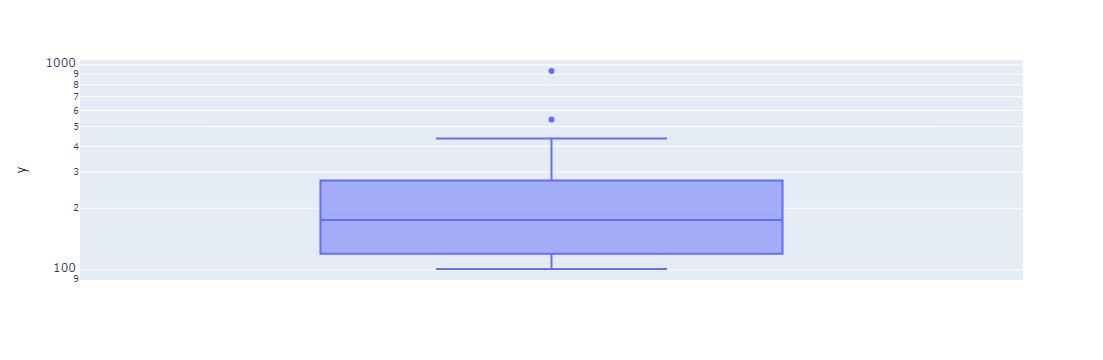

In [26]:
# Plot the frequencies on a bar plot
fig = px.box(RC_df, y=Occur_vals, log_y=True)
fig.show()

In [27]:
# Sort through dictionary and only include the more frequent code events
Occur_dict = {k: v for k, v in Occur_dict.items() if v > 100}
Occur_vals = list(Occur_dict.values())
Occur_keys = list(Occur_dict.keys())
Occur_keys

['Personnel issues-Psychological-Attention/monitoring-Monitoring other aircraft-Pilot - C',
 'Aircraft-Aircraft oper/perf/capability-Performance/control parameters-Altitude-Not attained/maintained - C',
 'Personnel issues-Psychological-Attention/monitoring-Monitoring environment-Pilot - C',
 'Aircraft-Aircraft oper/perf/capability-Performance/control parameters-Directional control-Not attained/maintained - C',
 'Not determined-Not determined-(general)-(general)-Unknown/Not determined',
 'Personnel issues-Task performance-Use of equip/info-Use of equip/system-Pilot',
 'Aircraft-Aircraft oper/perf/capability-Performance/control parameters-Descent rate-Not attained/maintained',
 'Aircraft-Aircraft oper/perf/capability-Performance/control parameters-Prop/rotor parameters-Not attained/maintained',
 'Personnel issues-Task performance-Use of equip/info-Aircraft control-Instructor/check pilot',
 'Personnel issues-Task performance-Use of equip/info-Aircraft control-Pilot - C',
 'Personnel issue

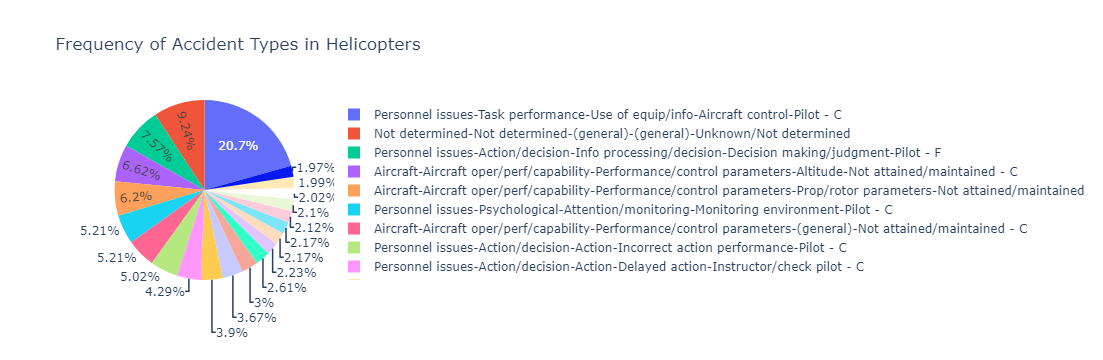

In [28]:
fig = px.pie(values=Occur_vals, names=Occur_keys, title='Frequency of Accident Types in Helicopters')
fig.show()

In [33]:
# Figure out how many accidents occur based on group type (string before first '-') in findings
# populate column with only the first term in occur_keys - if string in other string then select that string
type_ls = []
for key in Occur_keys:
    ls = re.split('-', key)
    type_ls.append(ls[0])
type_ls = list(set(type_ls))
type_ls

['Aircraft', 'Not determined', 'Personnel issues', 'Environmental issues']

In [34]:
# create new column with only the types of faults so I can identify how many of each have ocurred
def find_type(description): #description is a place holder for whatever column the function is applied to
    for type in type_ls:
        if type in description:
            return type
    return None
# Apply the function to create a new column
RC_df['finding_type'] = RC_df['finding_description'].apply(find_type)

C:\Users\yxb19198\AppData\Local\Temp\ipykernel_34056\2289464429.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



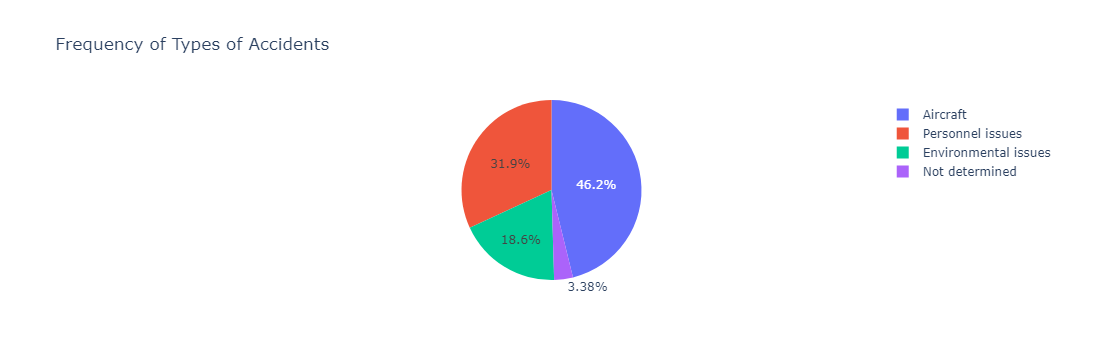

In [35]:
# Figure out values for each type of fault and how many times they have occurred
len_type_ls = []
for type in type_ls:
    count = len(RC_df[RC_df['finding_type'] == type])
    len_type_ls.append(count)
# create a pie chart
fig = px.pie(values=len_type_ls, names=type_ls, title='Frequency of Types of Accidents')
fig.show()

In [36]:
# Limit the accidents to only aircraft specific ones
RC_df_air = RC_df[RC_df['finding_type'] == 'Aircraft']
# Highlight the affected subsystem (usually the 3rd and 4th is most relevant)
# will start with the 3rd using the same method as previously except a lot more options now
# create a list of all possible options
air_fault_ls = []
for key in Occur_keys:
    ls = re.split('-', key)
    val = ls[3] 
    air_fault_ls.append(val)
air_fault_ls = list(set(air_fault_ls))
air_fault_ls

['Incorrect action performance',
 'Gusts',
 'Fuel',
 'Spatial disorientation',
 'Directional control',
 'Lack of action',
 'Delayed action',
 'Altitude',
 '(general)',
 'Prop/rotor parameters',
 'Preflight inspection',
 'Use of equip/system',
 'Descent rate',
 'Aircraft control',
 'Identification/recognition',
 'Decision making/judgment',
 'Monitoring environment',
 'Monitoring other aircraft']

In [37]:
def find_component_type(description):
    for air_fault in air_fault_ls:
        if air_fault in description:
            return air_fault
    return None
# Apply the function to create a new column
RC_df['aircraft_type_finding'] = RC_df['finding_description'].apply(find_component_type)

C:\Users\yxb19198\AppData\Local\Temp\ipykernel_34056\1124922107.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[441, 187, 653, 112, 208, 208, 316, 423, 2241, 417, 137, 284, 162, 1441, 124, 512, 302, 199]


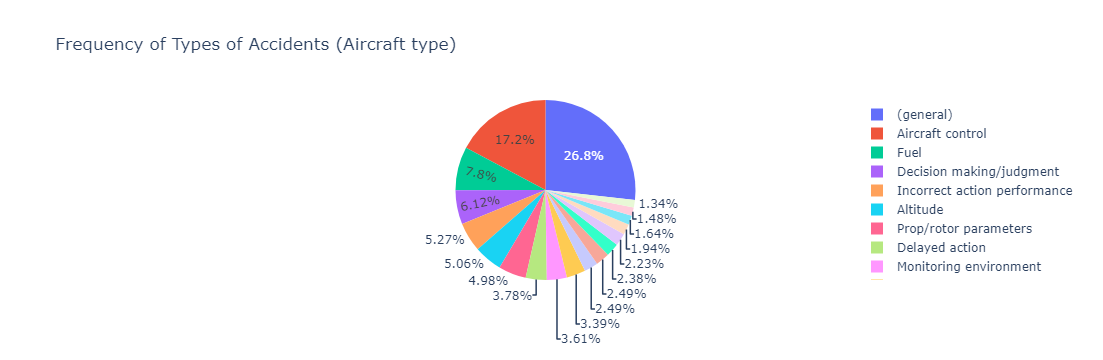

In [38]:
len_air_fault_ls = []
for type in air_fault_ls:
    count = len(RC_df[RC_df['aircraft_type_finding'] == type])
    len_air_fault_ls.append(count)
print(len_air_fault_ls)
# create a pie chart
fig = px.pie(values=len_air_fault_ls, names=air_fault_ls, title='Frequency of Types of Accidents (Aircraft type)')
fig.show()
# fig.write_image("images/fig1.png")

In [ ]:
# Figure out the severity of the accidents based on the seq_events codes 